In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import sqlite3

con = sqlite3.connect('mydb.sqlite')

sql = "SELECT name FROM sqlite_master WHERE type='table'"

pd.read_sql(sql, con)

,name
0,airlines
1,airports
2,planes
3,weather
4,flights


In [4]:
df = pd.read_sql("SELECT * FROM flights", con)
df

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,4,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,12,31,2328.0,2330,-2.0,412.0,409,3.0,B6,1389,N651JB,EWR,SJU,198.0,1608,23,30,2013-12-31 23:00:00
336772,336772,2013,12,31,13.0,2359,14.0,439.0,437,2.0,B6,839,N566JB,JFK,BQN,189.0,1576,23,59,2013-12-31 23:00:00
336773,336773,2013,12,31,18.0,2359,19.0,449.0,444,5.0,DL,412,N713TW,JFK,SJU,192.0,1598,23,59,2013-12-31 23:00:00
336774,336774,2013,12,31,2355.0,2359,-4.0,430.0,440,-10.0,B6,1503,N509JB,JFK,SJU,195.0,1598,23,59,2013-12-31 23:00:00


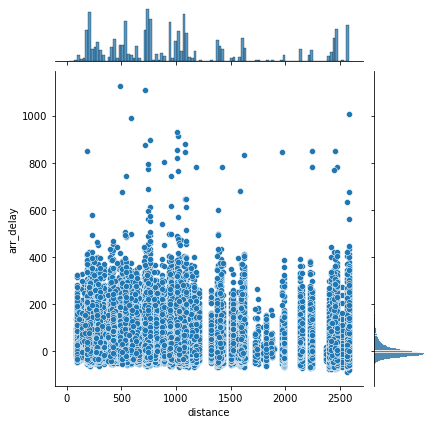

In [5]:
# Q1

# Removing the distant outliers -- Hawaii and Alaska
df = df[df['distance'] < 3000]

sns.jointplot(data=df, x="distance", y="arr_delay")

<AxesSubplot:xlabel='distance', ylabel='arr_delay'>

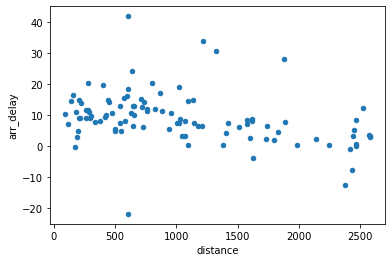

In [6]:
# Q2

df = df.groupby('dest').mean()

df.plot.scatter("distance", "arr_delay")

In [7]:
df = pd.read_sql("SELECT * FROM flights GROUP BY dest", con)
df

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,101278,2013,4,22,1712.0,1630,42.0,1946.0,1915,31.0,B6,1505,N821JB,JFK,ABQ,256.0,1826,16,30,2013-04-22 16:00:00
1,123467,2013,5,16,1134.0,1140,-6.0,1231.0,1247,-16.0,B6,1191,N279JB,JFK,ACK,43.0,199,11,40,2013-05-16 11:00:00
2,369,2013,1,1,1315.0,1317,-2.0,1413.0,1423,-10.0,EV,4112,N13538,EWR,ALB,33.0,143,13,17,2013-01-01 13:00:00
3,171157,2013,7,6,1629.0,1615,14.0,1954.0,1953,1.0,UA,887,N587UA,EWR,ANC,418.0,3370,16,15,2013-07-06 16:00:00
4,6,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,12,2013,1,1,558.0,600,-2.0,853.0,856,-3.0,B6,71,N657JB,JFK,TPA,158.0,1005,6,0,2013-01-01 06:00:00
101,740,2013,1,1,1952.0,1930,22.0,2358.0,2207,NaN,EV,4333,N11194,EWR,TUL,NaN,1215,19,30,2013-01-01 19:00:00
102,150836,2013,6,14,1756.0,1800,-4.0,2004.0,2005,-1.0,MQ,3402,N722MQ,LGA,TVC,101.0,655,18,0,2013-06-14 18:00:00
103,743,2013,1,1,2000.0,1930,30.0,2255.0,2140,75.0,EV,4361,N12567,EWR,TYS,138.0,631,19,30,2013-01-01 19:00:00


<AxesSubplot:xlabel='distance', ylabel='arr_delay'>

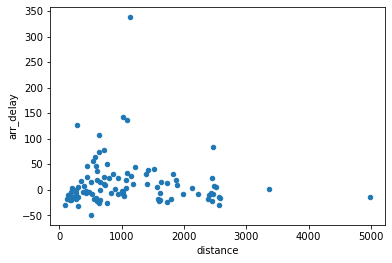

In [8]:
df.plot.scatter("distance", "arr_delay")

In [45]:
# Q3

from itertools import chain, combinations

df = pd.read_csv('flights.csv');

fields = ['year', 'month', 'day', 'hour', 'flight']

def key_options(items):
    return chain.from_iterable(combinations(items, r) for r in range(2, len(items)+1))

# iterate over all combos of grayed fields
for candidate in key_options(fields):
    deduped = df.drop_duplicates(candidate)
    
    print('Column:', candidate, ', Indexable rows:', len(deduped.index), ', Total rows:', len(df.index))
    if len(deduped.index) == len(df.index):
        print(','.join(candidate))

Column: ('year', 'month') , Indexable rows: 12 , Total rows: 336776
Column: ('year', 'day') , Indexable rows: 31 , Total rows: 336776
Column: ('year', 'hour') , Indexable rows: 20 , Total rows: 336776
Column: ('year', 'flight') , Indexable rows: 3844 , Total rows: 336776
Column: ('month', 'day') , Indexable rows: 365 , Total rows: 336776
Column: ('month', 'hour') , Indexable rows: 229 , Total rows: 336776
Column: ('month', 'flight') , Indexable rows: 19489 , Total rows: 336776
Column: ('day', 'hour') , Indexable rows: 590 , Total rows: 336776
Column: ('day', 'flight') , Indexable rows: 77935 , Total rows: 336776
Column: ('hour', 'flight') , Indexable rows: 13999 , Total rows: 336776
Column: ('year', 'month', 'day') , Indexable rows: 365 , Total rows: 336776
Column: ('year', 'month', 'hour') , Indexable rows: 229 , Total rows: 336776
Column: ('year', 'month', 'flight') , Indexable rows: 19489 , Total rows: 336776
Column: ('year', 'day', 'hour') , Indexable rows: 590 , Total rows: 336776

In [48]:
def key_options(items):
    return chain.from_iterable(combinations(items, r) for r in range(len(items), len(items)+1))

# iterate over all combos of given fields
for candidate in key_options(fields):
    deduped = df.drop_duplicates(candidate)
    
    print('Column:', candidate)
    print('Indexable rows:', len(deduped.index))
    print('Total rows:', len(df.index))
    if len(deduped.index) == len(df.index):
        print('Yes, these columns can be primary key')
    else:
        print('No, these columns cannot be primary key')

Column: ('year', 'month', 'day', 'hour', 'flight')
Indexable rows: 333831
Total rows: 336776
No, these columns cannot be primary key


In [49]:
fields = ['year', 'month', 'day', 'hour', 'flight', 'carrier']

def key_options(items):
    return chain.from_iterable(combinations(items, r) for r in range(len(items), len(items)+1))

# iterate over all combos of given fields
for candidate in key_options(fields):
    deduped = df.drop_duplicates(candidate)
    
    print('Column:', candidate)
    print('Indexable rows:', len(deduped.index))
    print('Total rows:', len(df.index))
    if len(deduped.index) == len(df.index):
        print('yes, these columns can be primary key')

Column: ('year', 'month', 'day', 'hour', 'flight', 'carrier')
Indexable rows: 336776
Total rows: 336776
yes, these columns can be primary key


In [51]:
# Q4

df = pd.read_sql("SELECT carrier, tailnum, month, day FROM flights WHERE tailnum IN (SELECT tailnum FROM planes WHERE manufacturer = 'AIRBUS INDUSTRIE') LIMIT 10", con)

df

,carrier,tailnum,month,day
0,B6,N516JB,1,1
1,DL,N326NB,1,1
2,UA,N459UA,1,1
3,US,N807AW,1,1
4,US,N178US,1,1
5,DL,N327NW,1,1
6,DL,N318NB,1,1
7,UA,N838UA,1,1
8,UA,N841UA,1,1
9,UA,N488UA,1,1


In [52]:
df = pd.read_sql("SELECT flights.carrier, flights.tailnum, flights.month, flights.day FROM flights INNER JOIN planes ON flights.tailnum=planes.tailnum WHERE planes.manufacturer = 'AIRBUS INDUSTRIE' LIMIT 10", con)

df

,carrier,tailnum,month,day
0,B6,N516JB,1,1
1,DL,N326NB,1,1
2,UA,N459UA,1,1
3,US,N807AW,1,1
4,US,N178US,1,1
5,DL,N327NW,1,1
6,DL,N318NB,1,1
7,UA,N838UA,1,1
8,UA,N841UA,1,1
9,UA,N488UA,1,1
